# The KNN Model and the K-fold Cross Validation Method

About data : https://archive.ics.uci.edu/ml/datasets/automobile<br/>
Download URL: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In this notebook, the KNN model was applied for the car market dataset and optimized by changing different k values. After that, relavent features were examined by calculating RMSE. The K-fold Cross Validation Method was used to validate the RMSE values. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-of-doors', 'body-style',
        'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'curb-weight',
        'engine-type','num-of-cylinders', 'engine-size',
        'fuel-system', 'bore', 'stroke', 'compression-rate',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
        'price']

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names=cols)

In [3]:
data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

<h3>Data Cleaning</h3>
The following numeric columns were selected for further analyses.

In [5]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_data = data[continuous_values_cols]

Some columns include symbols like "?", and also use not numeric data which need to be converted into numeric data.

In [6]:
numeric_data = numeric_data.replace("?", np.nan)

In [7]:
numeric_data = numeric_data.astype('float')
numeric_data.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Null data was removed from "price" column.

In [8]:
numeric_data = numeric_data.dropna(subset=['price'])
numeric_data.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Missing values were replaced with the mean values.

In [9]:
numeric_data = numeric_data.fillna(numeric_data.mean())

In [10]:
numeric_data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

All columns except for the target column were normalized.

In [11]:
price_col = numeric_data['price']
numeric_data = (numeric_data - numeric_data.min())/(numeric_data.max() - numeric_data.min())
numeric_data['price'] = price_col

In [12]:
numeric_data.head(20)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0


<h3>A Univariate Model</h3>

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [14]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    last_train_row = int(len(rand_df) / 2)
    
    # DIvide dataset into train and test datasets.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse


In [15]:
rmse_results = {}
train_cols = numeric_data.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_data)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary 
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The results above showed RMSE for each feature (column).<br>
To use different k values, the function was modified.

In [16]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    last_train_row = int(len(rand_df) / 2)
    
    # DIvide dataset into train and test datasets.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)

        # Fit a KNN model using the k value.
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses


In [17]:
k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_data.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_data)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.8118602771337,
  9: 4515.1356174191033},
 'length': {1: 4628.45550

The results above showed the RMSE values with k = 1, 3, 5, 7, 9 for each feature.

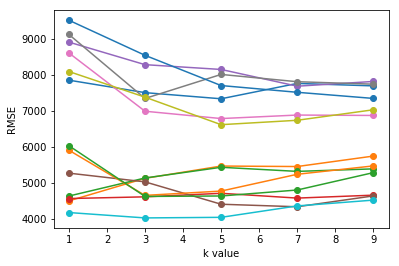

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,marker="o")
    plt.xlabel('k value')
    plt.ylabel('RMSE')

The graph visualized RMSE with the different k values for the features. According to the graph, as the k value increased to 5, RMSE tended to decrease. After that, big differences were not observed as the k value increased.

<h3>A Multivariate Model</h3>
The average RMSE was calculated with different combinations of the features and with the different k values.

In [19]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [20]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)

    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

According to the results above, horsepower, width, curb-weight, highway-mpg, length, and city-mpg were the columns with low RMSE. <br>Next RMSE was calculated by using different combinations of them. First the k value is fixed (k=5).

In [21]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_data)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_data)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_data)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_data)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_data)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.2611882141268},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

Compared to the average RMSE values with a single feature, the RMSE values decreased. The three groups, "three best features", "four best features", and "five best features", were the top values in RMSE. Next, RMSE for these groups were calculated with different k values.

In [22]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)

    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [23]:
k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_data)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_data)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_data)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.2904521188252,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468.02984

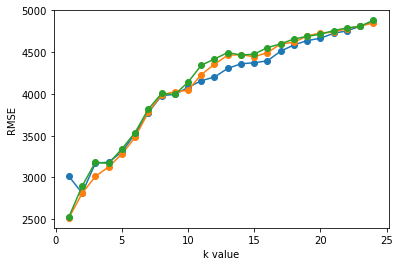

In [24]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,marker="o")
    plt.xlabel('k value')
    plt.ylabel('RMSE')

As the k value increases, RMSE also increases.

<h3>The K-fold Cross Validation Method</h3>
By using the K-fold Cross Validation Method, RMSE was calculated again.

In [25]:
from sklearn.model_selection import cross_val_score, KFold

In [26]:
features = numeric_data.iloc[:,:-1]
target = numeric_data["price"]

In [27]:
# Use the default fold number(=5).

kf = KFold(5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()
mses = cross_val_score(knn, features,
                       target,
                       scoring="neg_mean_squared_error", cv=kf)

In [28]:
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)
print(rmses)
print(avg_rmse)

[ 2522.33471948  3848.68656128  3870.25520308  4459.76973105  2884.01303083]
3517.01184914


For all features, the mean RMSE was 3517.<br>
RMSE for the top 3 groups were calculated.

In [29]:
def cross_validation(feature_cols, target_col, df):
    features = df[feature_cols]
    target = df[target_col]
    
    f_values = [i for i in range(2,27)]
    rmse_cv_results = {}

    for f in f_values:
        kf = KFold(f, shuffle=True, random_state=1)
        knn = KNeighborsRegressor(n_neighbors=3)
        mses = cross_val_score(knn, features,
                           target,
                           scoring="neg_mean_squared_error", cv=kf)

        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        rmse_cv_results[f] = avg_rmse
        
    return rmse_cv_results

In [30]:
cv_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = cross_validation(three_best_features, 'price', numeric_data)
cv_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = cross_validation(four_best_features, 'price', numeric_data)
cv_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = cross_validation(five_best_features, 'price', numeric_data)
cv_rmse_results["five best features"] = rmse_val

cv_rmse_results

{'five best features': {2: 3061.6332993644164,
  3: 2898.9327897552103,
  4: 2931.4947872998882,
  5: 2919.5086739801213,
  6: 2854.3547283027783,
  7: 2938.7662489896129,
  8: 2853.5823354556605,
  9: 2829.9650835263428,
  10: 2871.1878294105568,
  11: 2830.6315202720466,
  12: 2850.9229494006918,
  13: 2912.3905997206803,
  14: 2842.4283742143775,
  15: 2827.7249796327096,
  16: 2784.3033424936348,
  17: 2796.5551768955233,
  18: 2741.0247562508303,
  19: 2707.6884801605579,
  20: 2704.5915761014244,
  21: 2687.9558444894701,
  22: 2745.2399348483395,
  23: 2677.4844452476473,
  24: 2695.477220079883,
  25: 2696.5538998178458,
  26: 2609.5401124092623},
 'four best features': {2: 2968.8765693155856,
  3: 2837.2408408333254,
  4: 2828.2154680645699,
  5: 2796.6962936963332,
  6: 2762.6161858240698,
  7: 2827.2807188838901,
  8: 2734.2605751095089,
  9: 2740.0257570628401,
  10: 2792.6363874632043,
  11: 2761.6446172669826,
  12: 2775.8796286622073,
  13: 2828.8961345020311,
  14: 2762

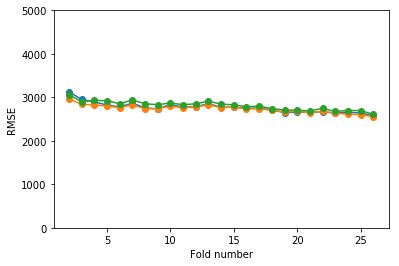

In [31]:
for k,v in cv_rmse_results.items():

    x = list(v.keys())
    y = list(v.values())

    plt.plot(x,y,marker="o")
    plt.xlabel('Fold number')
    plt.ylabel('RMSE')
    plt.ylim(0,5000)

RMSE slightly dcreased as the k value increased. Without using the K-fold Cross Validaton Method, the train and test datasets were separated in one way, and RMSE was calculated with different k values. On the other hand, with using the K-fold Cross Validaton Method, the dataset was divided into f groups (the f value varied) and the train and test datasets were changed in turns. Therefore one could conclude that RMSE with the K-fold Cross Validaton Method was more reliable. According to the analyses, the price was predicted within an error of $3000 by using the KNN Model with the parameters .